# Secure Pipeline For Machine Learning With Homomorphic Encryption

# Table of Contents
    1. Introduction:
        Scenario
        Goal
       
 
    2. Data Wrangling
    
    3. Exploratory Data Analysis:
         
    4. Machine Learning
        Predictions
    
    5. Conclusions


# 1. Introduction

# Scenario:


As a company, we aim to forecast the salary of a potential employee based on the available data, in order to make an informed decision about their compensation in the future.

# Goal: 





    -To predict salary of the new employee.
    
    -To experiment with various  Models & see which yields  greatest accuracy. 
   

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data Wrangling

In [2]:
filePath = 'employee_data.csv'

data = pd.read_csv(filePath)

data.head(5)

,age,healthy_eating,active_lifestyle,Gender,salary
0,36,5,5,1,2297
1,55,3,5,1,1134
2,61,8,1,1,4969
3,29,3,6,1,902
4,34,6,2,1,3574


In [3]:
data.head(1).values

array([[  36,    5,    5,    1, 2297]], dtype=int64)

In [4]:
print("(Rows, columns): " + str(data.shape))


(Rows, columns): (1000, 5)


In [5]:
data.columns 

Index(['age', 'healthy_eating', 'active_lifestyle', 'Gender', 'salary'], dtype='object')

In [6]:
data.nunique(axis=0)# returns the number of unique values for each variable.

age                  47
healthy_eating       11
active_lifestyle     11
Gender                2
salary              101
dtype: int64

In [7]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
data.describe()

,age,healthy_eating,active_lifestyle,Gender,salary
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,41.155000,4.944000,5.683000,0.51000,2227.46100
std,13.462995,2.013186,2.048587,0.50015,1080.20976
min,18.000000,0.000000,0.000000,0.00000,553.00000
25%,30.000000,4.000000,4.000000,0.00000,1360.00000
50%,41.000000,5.000000,6.000000,1.00000,2174.00000
75%,53.000000,6.000000,7.000000,1.00000,2993.75000
max,64.000000,10.000000,10.000000,1.00000,5550.00000


Luckily we have no missing data to handle!

In [8]:
# Display the Missing Values

print(data.isna().sum())

age                 0
healthy_eating      0
active_lifestyle    0
Gender              0
salary              0
dtype: int64


Let's see if theirs a good proportion between our positive and negative results. It appears we have a good balance between the two. 

In [9]:
data['salary'].value_counts()

2646    38
902     35
1252    35
3228    34
2414    34
        ..
2288     1
4155     1
3457     1
4276     1
5204     1
Name: salary, Length: 101, dtype: int64

# 3. Exploratory Data Analysis

<AxesSubplot:xlabel='age', ylabel='healthy_eating'>

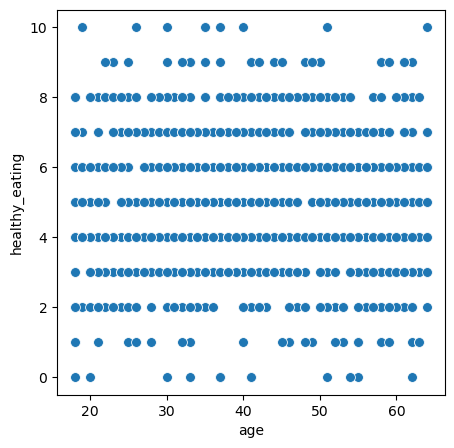

In [32]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=data['age'],y=data['healthy_eating'],palette="viridis",s=50)

<AxesSubplot:xlabel='salary', ylabel='healthy_eating'>

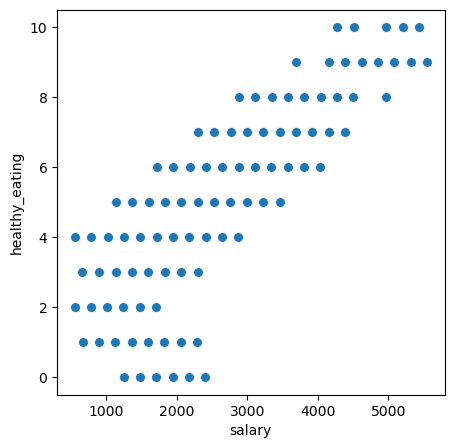

In [33]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=data['salary'],y=data['healthy_eating'],palette='rocket',s=50)

Pairplots are also a great way to immediatly see the correlations between all variables. 
But you will see me make it with only continous columns from our data, because with so many features, it can be difficult to see each one. 
So instead I will make a  pairplot with only our continous features. 

<AxesSubplot:xlabel='age', ylabel='salary'>

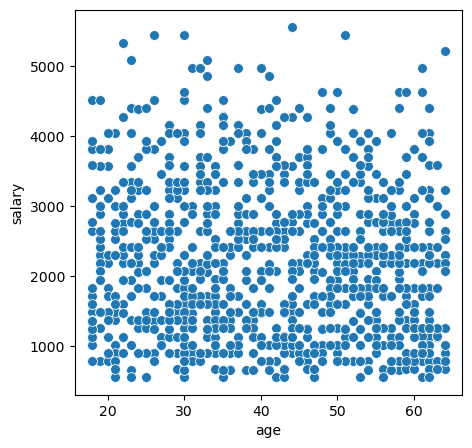

In [36]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=data['age'],y=data['salary'],palette='rocket',s=50)

# 4. Machine Learning 

# Prepare Data for Modeling

Assign the 4 features to X, & the last column to our predictor, y

In [13]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [14]:
X

array([[36,  5,  5,  1],
       [55,  3,  5,  1],
       [61,  8,  1,  1],
       ...,
       [49,  9,  7,  1],
       [56,  6,  7,  0],
       [64,  4,  9,  0]], dtype=int64)

In [15]:
y.shape

(1000,)

Split: the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)  

Normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
x_train[3]

array([ 0.20723345, -0.47831355,  0.15729302, -1.00501256])

# Modeling /Training

We will now Train various Classification Models on the Training set & see which yields the highest accuracy.
We will compare the accuracy of Logistic Regression, K-NN, SVM, Naives Bayes Classifier, Decision Trees, Random Forest, and XGBoost. Note: these are all supervised learning models. 

Model 1: Logistic Regression


In [19]:
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
# print(classification_report(y_test, y_pred1)) # output accuracy
print(accuracy_score(y_test, y_pred1))

0.265


Model 2: GaussianNB


In [20]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(accuracy_score(y_test, y_pred2)) # output accuracy

0.93


Model 3: Decision Trees


In [21]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(accuracy_score(y_test, y_pred3)) # output accuracy

0.965


Model 4: Random Forest


In [22]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(random_state=1)# get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(accuracy_score(y_test, y_pred4)) # output accuracy

0.9


In [23]:
x_test[0]

array([ 0.0576739 , -0.47831355, -1.78609566, -1.00501256])

In [24]:
print(model1.predict(sc.transform([[36,5,5,1]])))
print(model2.predict(sc.transform([[36,5,5,1]])))
print(model3.predict(sc.transform([[36,5,5,1]])))
print(model4.predict(sc.transform([[36,5,5,1]])))





[2878]
[2297]
[2297]
[2297]


In [25]:
import pickle


In [26]:
# Example of saving a scikit-learn model using pickle
pickle.dump(model4, open('decsiontree_model.pkl','wb'))


In [27]:
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)